# 2 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Exploratory Data Analysis](#2_Exploratory_Data_Analysis)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load The Data](#2.4_Load_The_Data)
    * [2.4.1 Listing Price](#2.4.1_Listing_Price)

## 2.2 Introduction<a id='2.2_Introduction'></a>

## 2.3 Imports<a id='2.3_Imports'></a>

In [45]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.preprocessing import scale
from scipy.stats import skew, norm
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from scipy import stats

## 2.4 Load The Data<a id='2.4_Load_The_Data'></a>

In [2]:
SingleFamilyHome = pd.read_csv('../data/processed/SingleFamily.csv')

In [3]:
SingleFamilyHome.head()

image_link  ListingPrice  \
0  ['https://photos.harstatic.com/188738555/hr/im...        379990   
1  ['https://photos.harstatic.com/189115063/hr/im...        394990   
2  ['https://photos.harstatic.com/186855660/hr/im...        394990   
3  ['https://photos.harstatic.com/188972348/hr/im...        409000   
4  ['https://photos.harstatic.com/189100987/hr/im...        408000   

                Address     City  ZipCode         County  \
0  1727 Eado Point Lane  Houston    77003  Harris County   
1  2712 EaDo Grove Lane  Houston    77003  Harris County   
2  2714 EaDo Grove Lane  Houston    77003  Harris County   
3      1806 Elite Drive  Houston    77003  Harris County   
4   2614 Capitol Street  Houston    77003  Harris County   

                                     Legal  NoBed  Stories  \
0                   LT 13 BLK 2 EADO POINT      3      3.0   
1                   LT 21 BLK 1 EaDo Grove      3      3.0   
2                   LT 22 BLK 1 EaDo Grove      3      3.0   
3           LT 8 BLK 1 ELITE TOWNHOMES LLC      3      4.0   
4  LT 7 BLK 1 CAPITOL OAKS SEC 1 2ND AMEND      3      3.0   

                             Style  ...  MedianSqft  NeighborValRangeMin  \
0              Contemporary/Modern  ...        1485                   51   
1              Contemporary/Modern  ...        1485                   51   
2              Contemporary/Modern  ...        1485                   51   
3              Contemporary/Modern  ...        1434                   35   
4  Contemporary/Modern,Traditional  ...        1563                  360   

   NeighborValRangeMax  MedianPrice/Sqft PaidTax TaxRate TotalBedSqft  \
0                  383            192.51  2169.0  2.6554   472.333333   
1                  383            192.51  2169.0  2.6554   474.000000   
2                  383            192.51  2169.0  2.6554   474.000000   
3                  383            186.01   886.0  2.5264   474.000000   
4                  527            200.05  8899.0  2.5466   522.000000   

  FullBath HalfBath MaintenanceFee  
0        3        1         1195.0  
1        3        1         1195.0  
2        3        1         1195.0  
3        3        1         1200.0  
4        3        1         2250.0  

[5 rows x 58 columns]

In [4]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           7172 non-null   object 
 1   ListingPrice         7172 non-null   int64  
 2   Address              7172 non-null   object 
 3   City                 7172 non-null   object 
 4   ZipCode              7172 non-null   int64  
 5   County               7172 non-null   object 
 6   Legal                7172 non-null   object 
 7   NoBed                7172 non-null   int64  
 8   Stories              7172 non-null   float64
 9   Style                7172 non-null   object 
 10  YearBuilt            7172 non-null   int64  
 11  BuildSqft            7172 non-null   int64  
 12  LotSize              7172 non-null   float64
 13  Fireplace            7172 non-null   int64  
 14  Heating              7172 non-null   object 
 15  Cooling              7172 non-null   o

In [5]:
SingleFamilyHome.shape

(7172, 58)

Zip code should be categorical not int64

In [15]:
SingleFamilyHome.ZipCode = SingleFamilyHome.ZipCode.astype('object',copy=False)

In [16]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7171 entries, 0 to 7171
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           7171 non-null   object 
 1   ListingPrice         7171 non-null   int64  
 2   Address              7171 non-null   object 
 3   City                 7171 non-null   object 
 4   ZipCode              7171 non-null   object 
 5   County               7171 non-null   object 
 6   Legal                7171 non-null   object 
 7   NoBed                7171 non-null   int64  
 8   Stories              7171 non-null   float64
 9   Style                7171 non-null   object 
 10  YearBuilt            7171 non-null   int64  
 11  BuildSqft            7171 non-null   int64  
 12  LotSize              7171 non-null   float64
 13  Fireplace            7171 non-null   int64  
 14  Heating              7171 non-null   object 
 15  Cooling              7171 non-null   o

In [17]:
categorical=[]
numerical=[]
for i in range(SingleFamilyHome.columns.size):
    if SingleFamilyHome.iloc[:,i].dtype=="object":
        categorical.append(SingleFamilyHome.columns[i])
    else:
        numerical.append(SingleFamilyHome.columns[i])

## 2.5 Numerical Variables<a id='2.5_Numerical_Variables'></a>

First lets look at numerical variables to see what are their statistics summary, correlation and their distribution

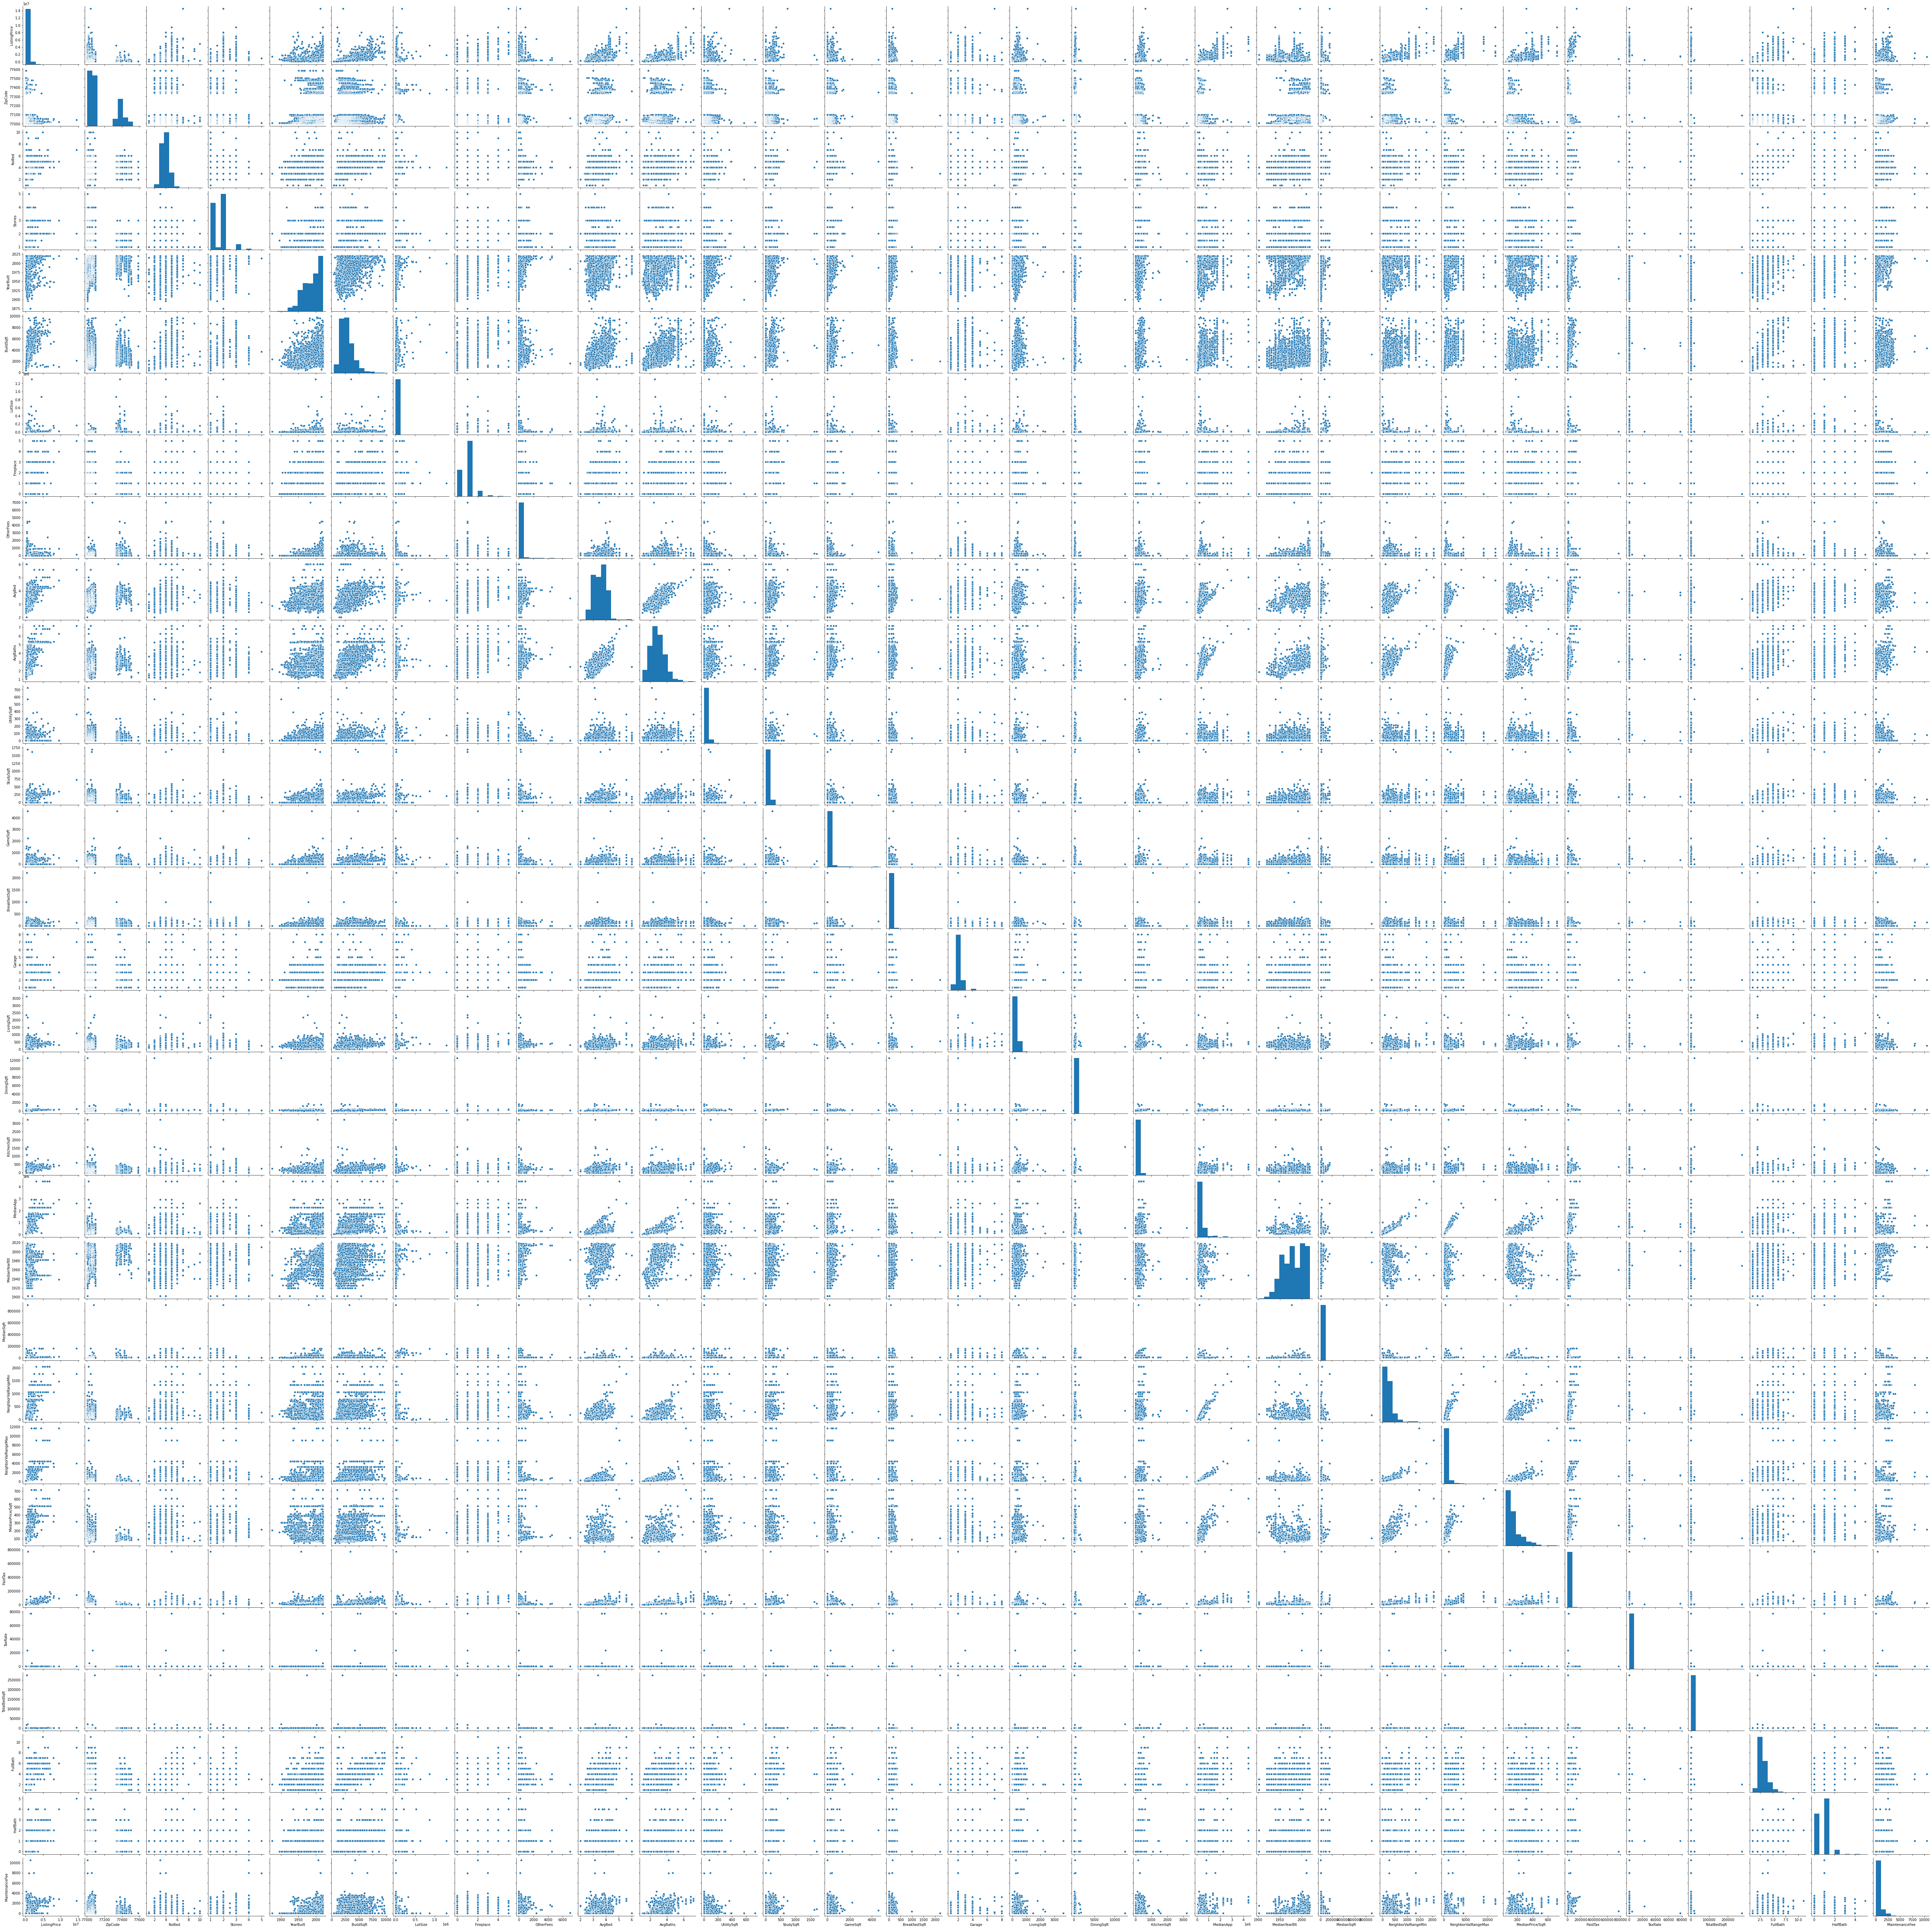

In [7]:
sns.pairplot(SingleFamilyHome)

### 2.4.1 Listing Price<a id='2.4.1_Listing_Price'></a>

In [8]:
SingleFamilyHome.ListingPrice.describe()

count    7.172000e+03
mean     5.409770e+05
std      6.476968e+05
min      1.000000e+00
25%      2.425000e+05
50%      3.499000e+05
75%      5.750000e+05
max      1.450000e+07
Name: ListingPrice, dtype: float64

it seems minimum listing price is $1 which needs to be investigated.

In [9]:
SingleFamilyHome.loc[SingleFamilyHome.ListingPrice <10000]

image_link  ListingPrice  \
3204  ['https://photos.harstatic.com/189947720/hr/im...             1   

                    Address     City ZipCode         County  \
3204  7626 Candlegreen Lane  Houston   77071  Harris County   

                                                  Legal  NoBed  Stories  \
3204  W 60 FT OF LT 23 BLK 4 FONDREN SW SOUTHMEADOW ...      3      1.0   

            Style  ...  MedianSqft  NeighborValRangeMin  NeighborValRangeMax  \
3204  Traditional  ...        6900                  120                  175   

      MedianPrice/Sqft PaidTax TaxRate TotalBedSqft FullBath HalfBath  \
3204             80.02  3566.0  2.5216        429.0        2        0   

     MaintenanceFee  
3204          325.0  

[1 rows x 58 columns]

There is one house with the price less than $10000.

In [10]:
#removing the row with the price less than $10000
SingleFamilyHome = SingleFamilyHome[SingleFamilyHome.ListingPrice >= 10000]

In [11]:
SingleFamilyHome.ListingPrice.describe()

count    7.171000e+03
mean     5.410524e+05
std      6.477105e+05
min      2.390000e+04
25%      2.425000e+05
50%      3.499000e+05
75%      5.750000e+05
max      1.450000e+07
Name: ListingPrice, dtype: float64

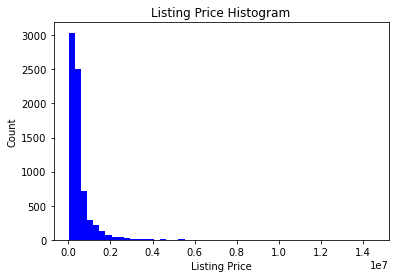

In [12]:
plt.hist(SingleFamilyHome.ListingPrice,bins=50, color='blue')
plt.xlabel('Listing Price')
plt.ylabel('Count')
plt.title('Listing Price Histogram')

plt.show()

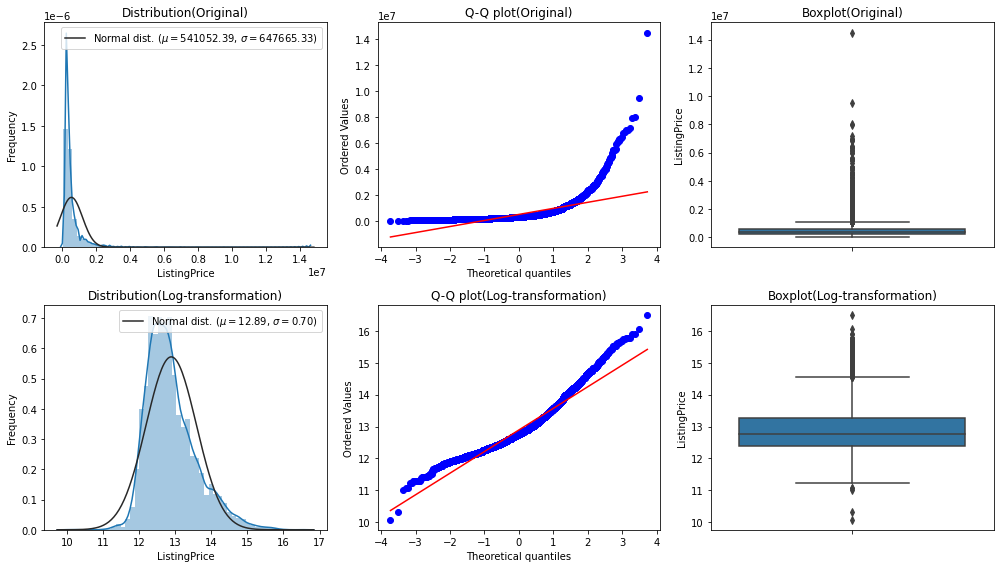

In [26]:
fig, ax = plt.subplots(2,3, figsize=(14,8))
##### Original
# histgram
sns.distplot(SingleFamilyHome['ListingPrice'] , fit=norm, ax=ax[0,0])
mu, sigma = norm.fit(SingleFamilyHome['ListingPrice'])
ax[0,0].legend([f'Normal dist. ($\mu=${mu:.2f}, $\sigma=${sigma:.2f})'], loc='best')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('Distribution(Original)')
# Q-Q plot
_ = stats.probplot(SingleFamilyHome['ListingPrice'], plot=ax[0,1])
ax[0,1].set_title('Q-Q plot(Original)')
# plot boxplot
sns.boxplot(SingleFamilyHome['ListingPrice'] , orient='v', ax=ax[0,2])
ax[0,2].set_title('Boxplot(Original)')

##### Log-transformation
logged = np.log1p(SingleFamilyHome['ListingPrice'])
# histgram
sns.distplot(logged , fit=norm, ax=ax[1,0])
mu, sigma = norm.fit(logged)
ax[1,0].legend([f'Normal dist. ($\mu=${mu:.2f}, $\sigma=${sigma:.2f})'], loc='best')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title('Distribution(Log-transformation)')
# Q-Q plot
_ = stats.probplot(logged, plot=ax[1,1])
ax[1,1].set_title('Q-Q plot(Log-transformation)')
# plot boxplot
sns.boxplot(logged , orient='v', ax=ax[1,2])
ax[1,2].set_title('Boxplot(Log-transformation)')

fig.tight_layout()

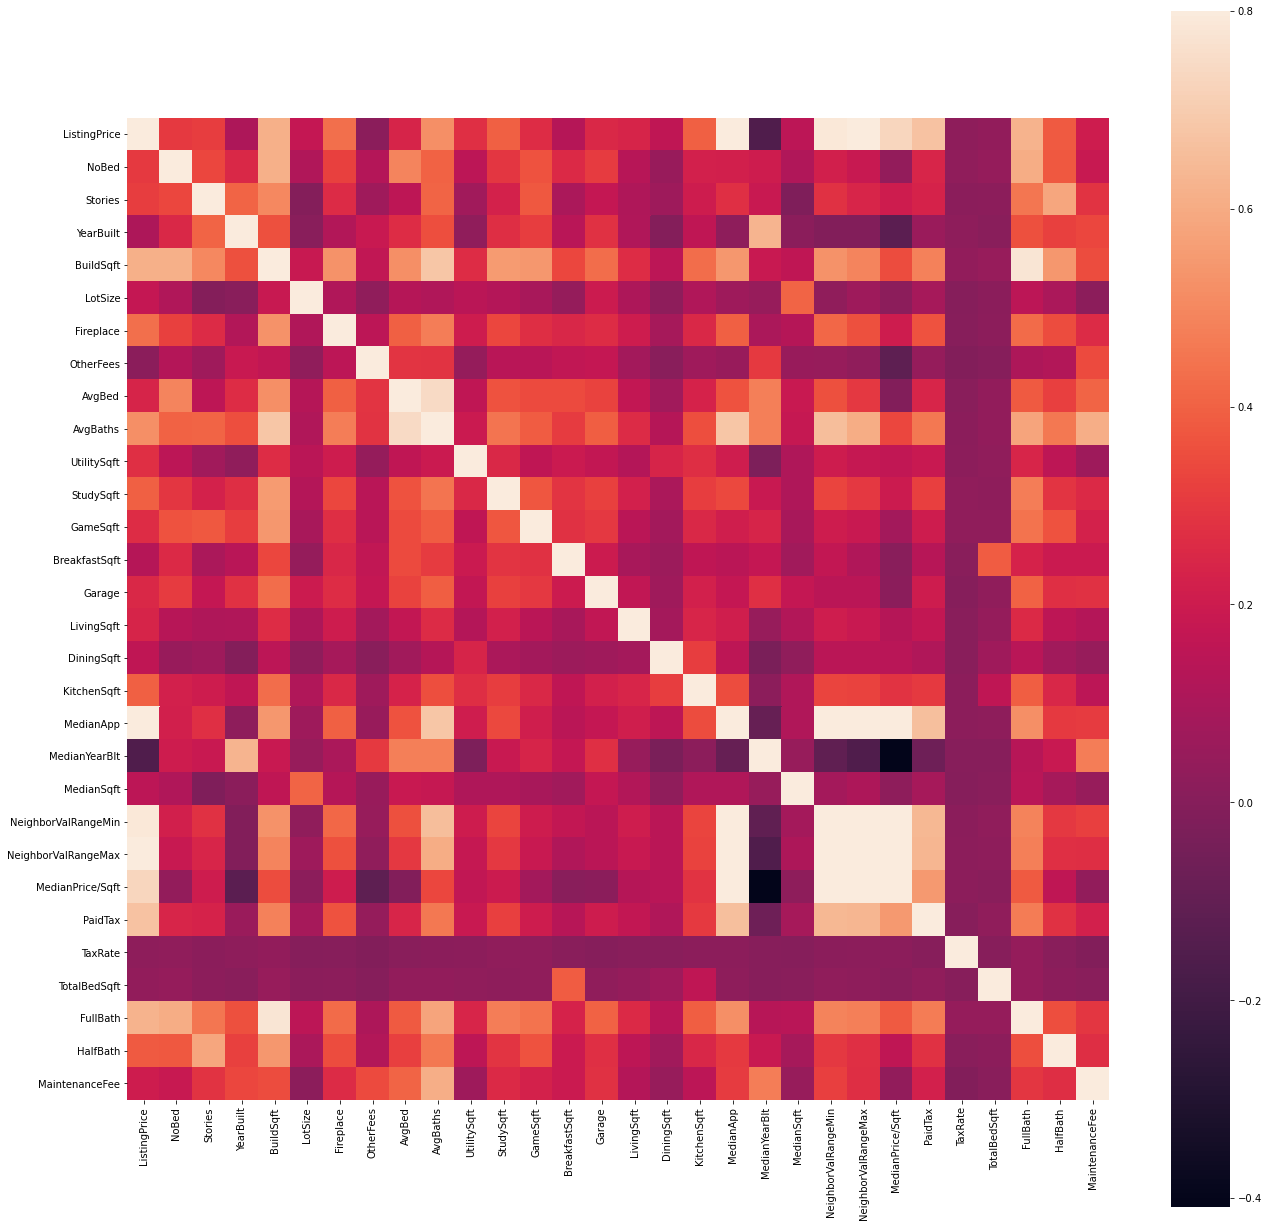

In [13]:
corr = SingleFamilyHome.select_dtypes(include=['float64', 'int64']).iloc[:,0:].corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, vmax=.8, square=True)

In [14]:
# Correlation between attributes with SalePrice
corr_list = corr['ListingPrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

MedianApp              0.827890
NeighborValRangeMax    0.803330
NeighborValRangeMin    0.786147
MedianPrice/Sqft       0.729954
PaidTax                0.670220
FullBath               0.624234
BuildSqft              0.613167
AvgBaths               0.519438
Fireplace              0.433498
StudySqft              0.396978
KitchenSqft            0.394802
HalfBath               0.383935
Stories                0.309914
NoBed                  0.302405
UtilitySqft            0.272128
GameSqft               0.263367
Garage                 0.250351
LivingSqft             0.236903
AvgBed                 0.235839
MaintenanceFee         0.202006
LotSize                0.175849
DiningSqft             0.158945
MedianSqft             0.149052
BreakfastSqft          0.133124
YearBuilt              0.109476
TotalBedSqft           0.032745
TaxRate                0.023864
OtherFees              0.015662
MedianYearBlt         -0.157907
Name: ListingPrice, dtype: float64

Listing price is highly correlated to Median appraisal followed by neighborhood max and min range. 

In [46]:
high_correlated_features = ['MedianApp','NeighborValRangeMax','NeighborValRangeMin','MedianPrice/Sqft','PaidTax',
                            'FullBath','BuildSqft','AvgBaths']

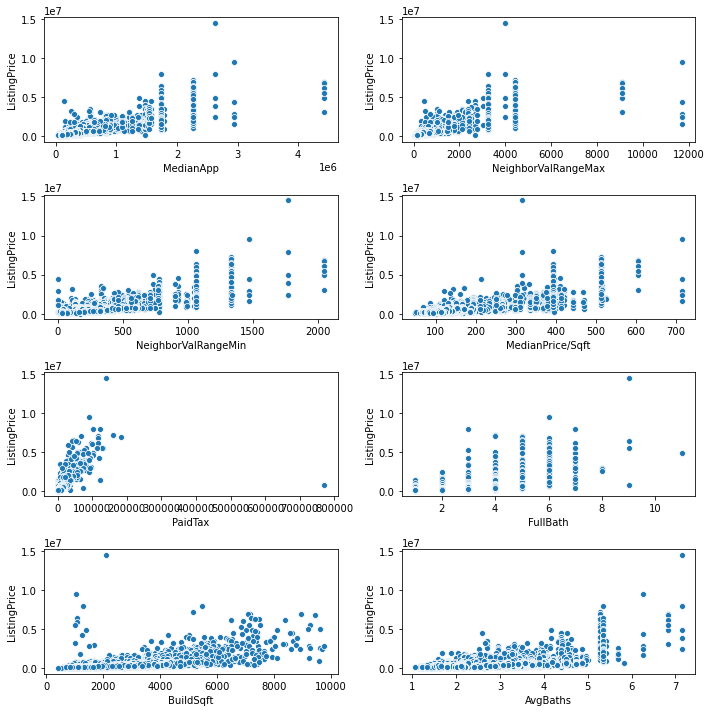

In [58]:
'''Plot appropriate graphs to comprehend the relationship'''
fig = plt.figure(figsize=(10,10))
spec = gridspec.GridSpec(ncols=2, nrows=4)
for i , var in enumerate(high_correlated_features):
    ax_i = fig.add_subplot(spec[i])
    sns.scatterplot(x=var, y='ListingPrice', data=SingleFamilyHome, palette='Blues_d')
plt.tight_layout()
plt.show()


In [51]:
SingleFamilyHome.describe()

ListingPrice        NoBed      Stories    YearBuilt    BuildSqft  \
count  7.171000e+03  7171.000000  7171.000000  7171.000000  7171.000000   
mean   5.410524e+05     3.730163     1.632339  1988.911170  2819.562544   
std    6.477105e+05     0.797386     0.606555    25.163245  1212.836784   
min    2.390000e+04     1.000000     1.000000  1875.000000   400.000000   
25%    2.425000e+05     3.000000     1.000000  1970.000000  1978.000000   
50%    3.499000e+05     4.000000     2.000000  1994.000000  2584.000000   
75%    5.750000e+05     4.000000     2.000000  2012.000000  3400.500000   
max    1.450000e+07    10.000000     5.000000  2021.000000  9769.000000   

            LotSize    Fireplace    OtherFees       AvgBed     AvgBaths  ...  \
count  7.171000e+03  7171.000000  7171.000000  7171.000000  7171.000000  ...   
mean   1.070174e+04     0.807000   146.469674     3.540463     2.888360  ...   
std    2.640827e+04     0.655083   242.827163     0.478630     0.842519  ...   
min    0.000000e+00     0.000000     0.000000     2.020000     1.060000  ...   
25%    6.325000e+03     0.000000     0.000000     3.160000     2.290000  ...   
50%    8.000000e+03     1.000000     0.000000     3.560000     2.780000  ...   
75%    9.825000e+03     1.000000   250.000000     3.900000     3.400000  ...   
max    1.306800e+06     5.000000  7000.000000     6.000000     7.150000  ...   

          MedianSqft  NeighborValRangeMin  NeighborValRangeMax  \
count    7171.000000          7171.000000          7171.000000   
mean     9342.285316           250.739785           561.817878   
std     14238.953315           204.142002           702.808523   
min      1375.000000             0.000000            68.000000   
25%      6600.000000           140.000000           230.000000   
50%      7910.000000           202.000000           355.000000   
75%      9264.000000           293.000000           631.500000   
max    903156.000000          2048.000000         11704.000000   

       MedianPrice/Sqft        PaidTax       TaxRate   TotalBedSqft  \
count       7171.000000    7171.000000   7171.000000    7171.000000   
mean         153.960622   10457.097740     28.133785     699.023360   
std           86.890937   14228.584955   1323.607958    3272.929134   
min           48.120000      53.000000      0.000000       0.000000   
25%           98.750000    4964.000000      2.421600     492.000000   
50%          119.340000    7503.000000      2.536600     629.000000   
75%          177.880000   11724.000000      2.764600     778.000000   
max          715.670000  771540.000000  77479.000000  275775.888889   

          FullBath     HalfBath  MaintenanceFee  
count  7171.000000  7171.000000     7171.000000  
mean      2.600335     0.651095      571.763213  
std       0.949386     0.591082      665.542316  
min       1.000000     0.000000        0.000000  
25%       2.000000     0.000000        0.000000  
50%       2.000000     1.000000      450.000000  
75%       3.000000     1.000000      790.000000  
max      11.000000     5.000000    10509.000000  

[8 rows x 30 columns]

In [20]:
def plot_hist(variable):
    """This function craets histogram for passed in variabled"""
    plt.figure(figsize=(9,3))
    plt.hist(SingleFamilyHome[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

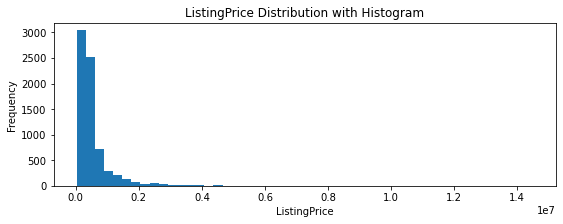

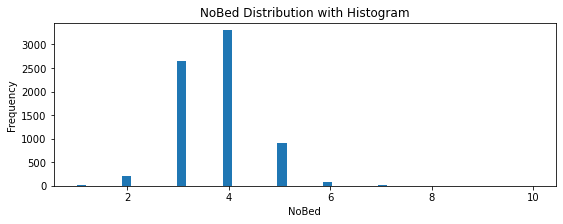

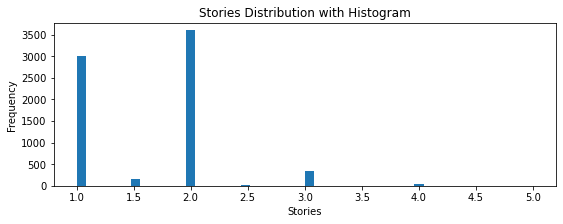

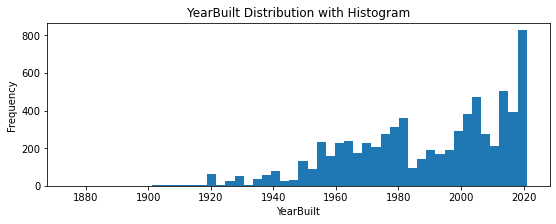

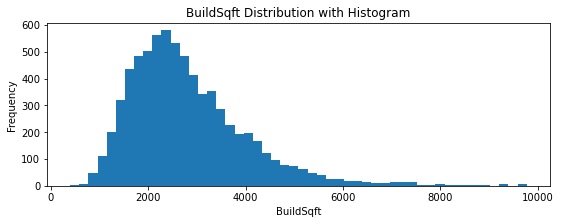

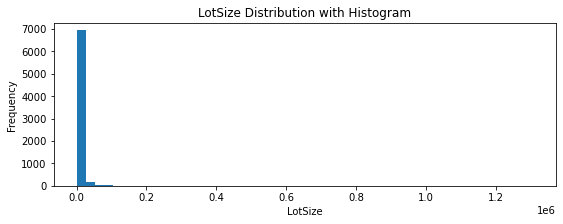

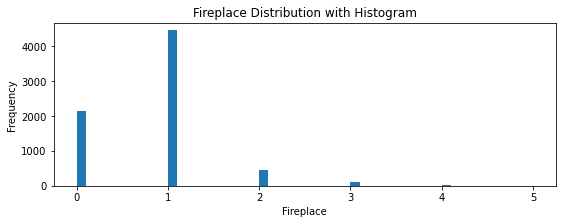

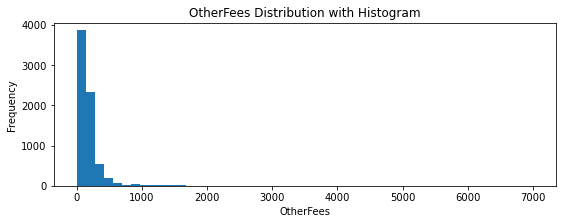

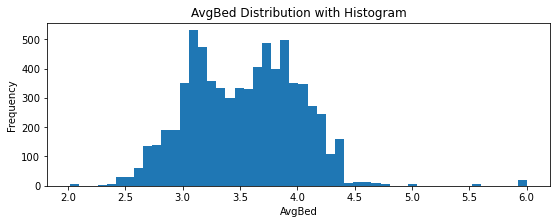

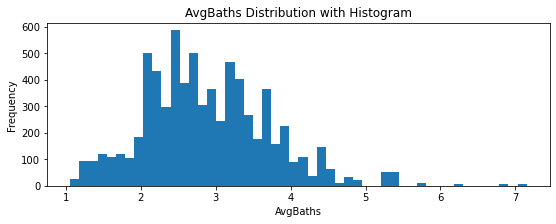

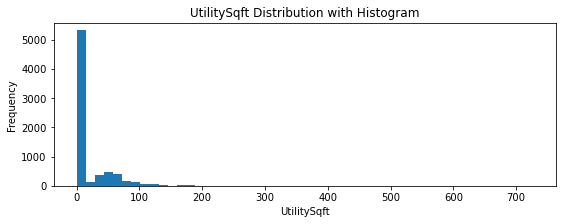

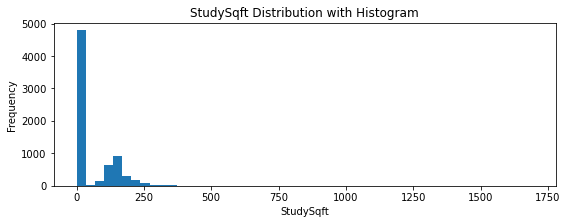

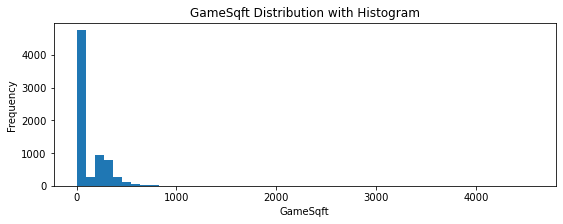

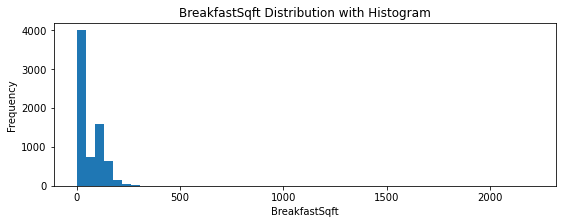

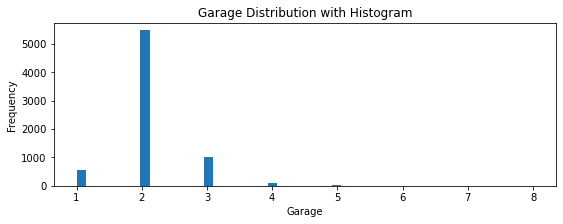

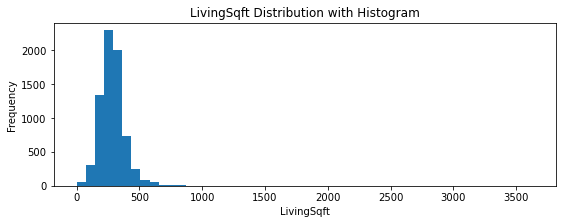

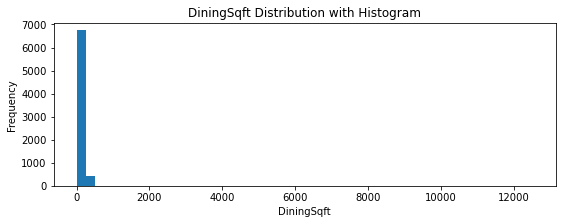

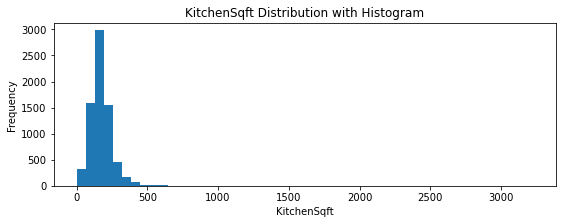

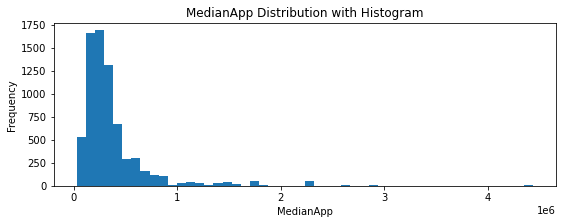

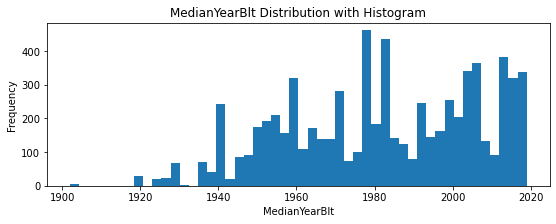

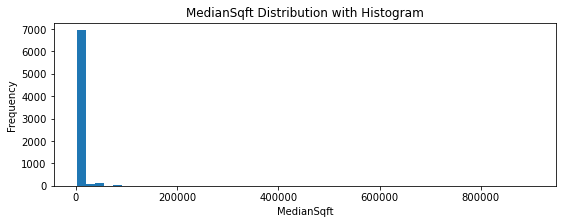

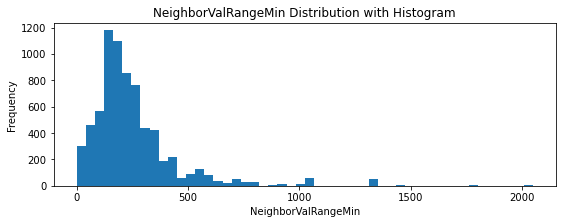

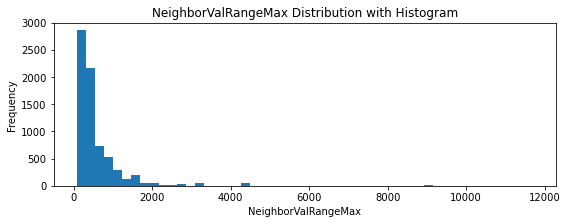

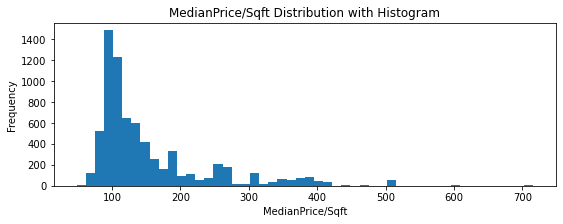

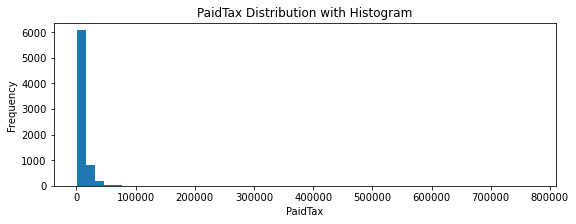

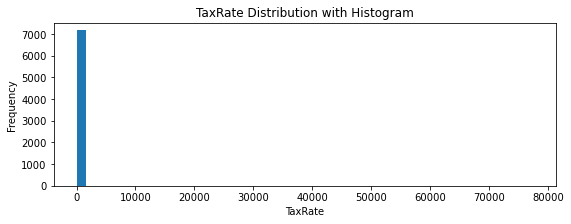

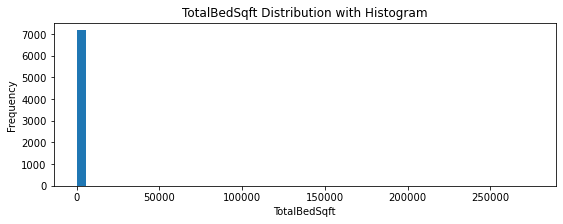

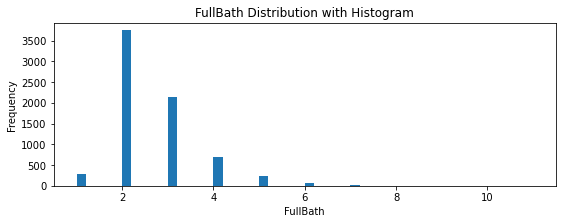

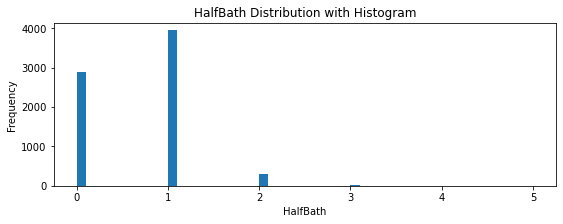

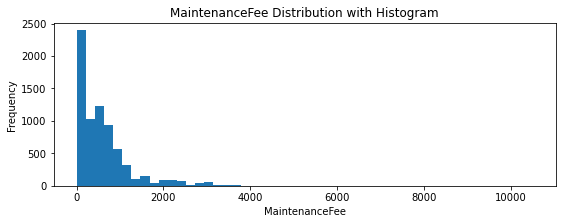

In [21]:
for i in numerical:
    plot_hist(i)

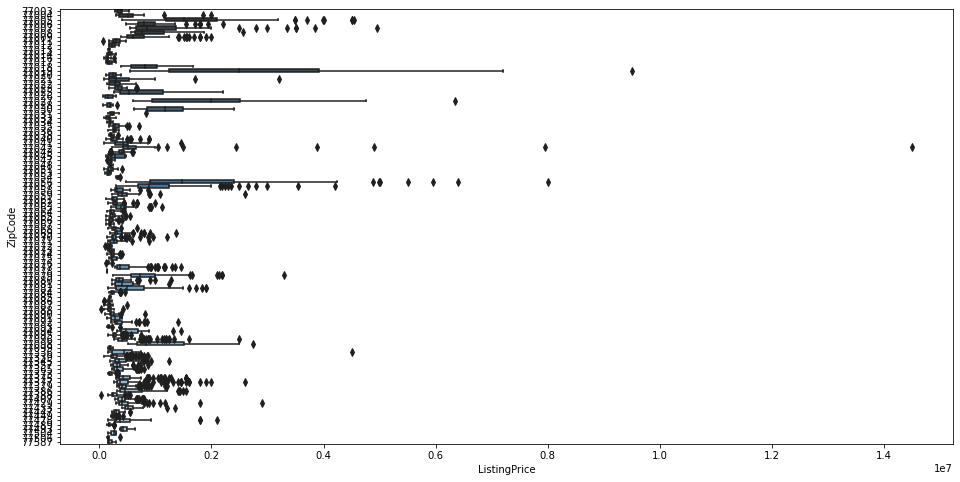

In [64]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='ListingPrice', y='ZipCode', data=SingleFamilyHome, palette='Blues_d',orient='h')